# Assignment2 - Supervised Learning flow

In [ ]:

# student details 1:  Dana M. 6074


# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: chatGPT
Goal: Structuring and organizing the code clearly
Propmpt1: Hey, I used a color palette in a seaborn barplot and got some kind of deprecation warning any idea how to fix it?
    
Propmpt2: Can you help me explain what a confusion matrix actually shows in a way that makes sense for a presentation?
    
Propmpt3: I'm using GridSearchCV with 3 models and different scalers How can I collect and display the results clearly?

Propmpt4: What does a correlation heatmap tell us in a dataset like Titanic?
    
Propmpt5: What exactly is F1_macro and when should I use it instead of regular F1 score?
       
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

In this project, we worked on a classification problem where the goal is to predict whether a Titanic passenger survived or not.
The dataset includes real information like age, gender, ticket class, fare, and more.
Using this data, we trained different machine learning models and compared their performance.
Along the way, we handled missing values, transformed features, and used cross-validation to find the best model.
    
</pre>

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [ ]:
import numpy as np
import pandas as pd
import statistics
import math
import string
import re
import scipy


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



from sklearn.metrics import f1_score,make_scorer, classification_report, confusion_matrix




In [ ]:
titanic_train= pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')


In [ ]:
titanic_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [ ]:

titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


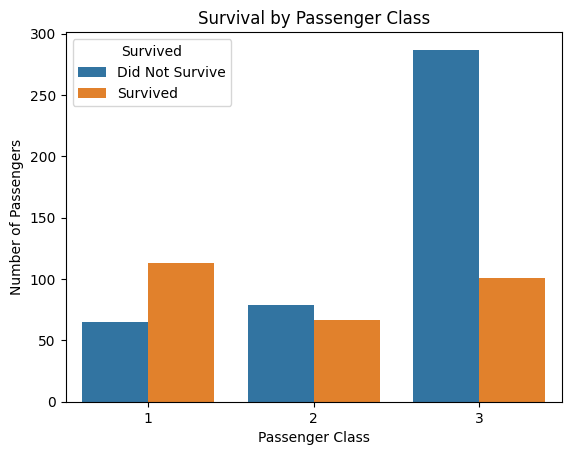

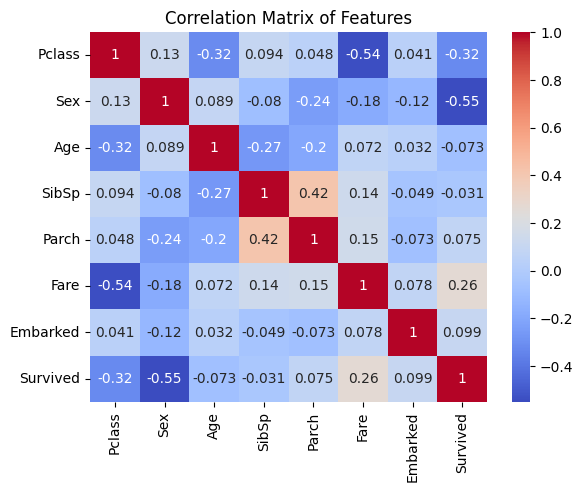

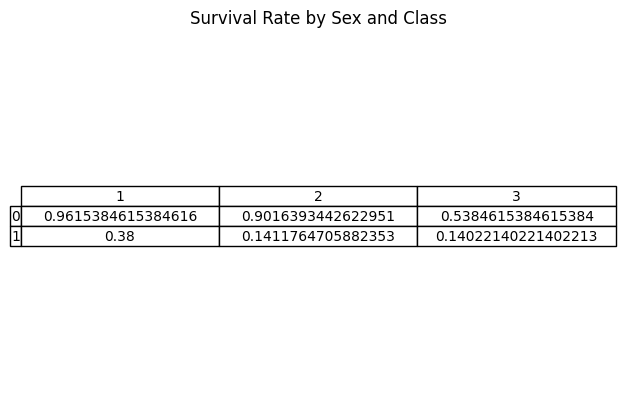

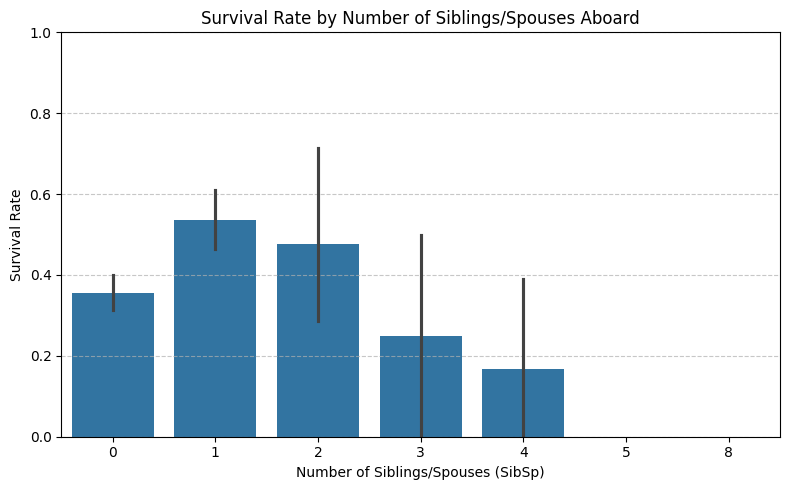

In [ ]:

sns.countplot(data=titanic_train, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()
print("\n")



correlation_matrix = titanic_train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()
print("\n")


table = pd.crosstab(titanic_train['Sex'], titanic_train['Pclass'],
values=titanic_train['Survived'], aggfunc='mean')


fig, ax = plt.subplots()
ax.axis('off')
tbl = ax.table(cellText=table.values,
               rowLabels=table.index,
               colLabels=table.columns,
               cellLoc='center',
               loc='center')
tbl.scale(1.2, 1.2)
plt.title("Survival Rate by Sex and Class")
plt.show()


plt.figure(figsize=(8,5))
sns.barplot(data=titanic_train, x='SibSp', y='Survived')
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses (SibSp)")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Part 3 - Experiments
You could add as many code cells as needed

In [ ]:


# Feature Engineering
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1
X = titanic_train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
y = titanic_train['Survived']

# פיצול ל-train ו-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# עמודות
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Pclass', 'Age', 'Fare', 'FamilySize']

# טרנספורמציה לקטגוריות
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# טרנספורמציה לערכים מספריים
numerical_transformer = SimpleImputer(strategy='mean')

# שילוב טרנספורמציות
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# הגדרת מודלים וסקיילרים
scalers = [None, MinMaxScaler(), StandardScaler()]
scaler_names = ['none', 'minmax', 'standard']

param_grid = []
for scaler, scaler_name in zip(scalers, scaler_names):
    for model, model_name, model_params in [
        (KNeighborsClassifier(), 'knn', {'classifier__n_neighbors': [3, 5, 7]}),
        (DecisionTreeClassifier(), 'dt', {'classifier__max_depth': [3, 5, 7]}),
        (GaussianNB(), 'bayes', {})
    ]:
        steps = [('preprocessor', preprocessor)]
        if scaler:
            steps.append(('scaler', scaler))
        steps.append(('classifier', model))
        pipe = Pipeline(steps=steps)
        config = {
            'pipeline': pipe,
            'params': model_params | {'classifier': [model]},
            'scaler': scaler_name
        }
        param_grid.append(config)

# מדד איכות
scorer = make_scorer(f1_score, average='macro')

# Grid Search ורישום כל התוצאות
summary_table = []

for config in param_grid:
    grid = GridSearchCV(config['pipeline'], config['params'], cv=5, scoring=scorer, return_train_score=True)
    grid.fit(X_train, y_train)
    model_name = config['pipeline'].named_steps['classifier'].__class__.__name__
    for mean_score, std_score, rank, params in zip(
        grid.cv_results_['mean_test_score'],
        grid.cv_results_['std_test_score'],
        grid.cv_results_['rank_test_score'],
        grid.cv_results_['params']
    ):
        summary_table.append({
            'Model': model_name,
            'Scaler': config['scaler'],
            'Hyperparameters': params,
            'F1_macro': mean_score,
            'Std': std_score,
            'Rank': rank
        })

# טבלה מסכמת מסודרת
summary_df = pd.DataFrame(summary_table).sort_values(by='F1_macro', ascending=False).reset_index(drop=True)

summary_df



,Model,Scaler,Hyperparameters,F1_macro,Std,Rank
0,DecisionTreeClassifier,none,"{'classifier': DecisionTreeClassifier(), 'clas...",0.808076,0.027585,1
1,DecisionTreeClassifier,minmax,"{'classifier': DecisionTreeClassifier(), 'clas...",0.806246,0.027691,1
2,DecisionTreeClassifier,standard,"{'classifier': DecisionTreeClassifier(), 'clas...",0.806026,0.030024,1
3,DecisionTreeClassifier,none,"{'classifier': DecisionTreeClassifier(), 'clas...",0.797295,0.034214,2
4,DecisionTreeClassifier,standard,"{'classifier': DecisionTreeClassifier(), 'clas...",0.797295,0.034214,2
5,DecisionTreeClassifier,minmax,"{'classifier': DecisionTreeClassifier(), 'clas...",0.793142,0.035526,2
6,KNeighborsClassifier,minmax,"{'classifier': KNeighborsClassifier(), 'classi...",0.788502,0.034357,1
7,KNeighborsClassifier,standard,"{'classifier': KNeighborsClassifier(), 'classi...",0.788074,0.031753,1
8,KNeighborsClassifier,standard,"{'classifier': KNeighborsClassifier(), 'classi...",0.787337,0.024082,2
9,KNeighborsClassifier,standard,"{'classifier': KNeighborsClassifier(), 'classi...",0.785815,0.019079,3


In [ ]:
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,1,0,54.0,1,0,78.2667,1,1,2
1,2,0,45.0,0,0,13.5000,0,1,1
2,3,1,20.0,0,0,9.5000,0,0,1
3,3,1,36.0,0,0,7.8958,0,0,1
4,3,1,22.0,0,0,8.0500,0,0,1


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [ ]:
#חלוקה לקטגוריות
numerical_features = ['Pclass', 'Age', 'Fare', 'FamilySize']
categorical_features = ['Sex', 'Embarked']

# טרנספורמציה לערכים קטגוריילים
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# טרנספורמציה לערכים מספריים
numerical_transformer = SimpleImputer(strategy='mean')

# שילוב העמודות
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# בניית פייפליין עם DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3))
])

# אימון על X_train
pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', DecisionTreeClassifier(max_depth=3))])

## Part 5 - Apply on test and show model performance estimation

In [ ]:

y_pred = pipeline.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
print(f" F1_macro על test: {f1:.4f}")

print("\n 5 first predication:")
print(y_pred[:5])

print("\n Classification Report:")
print(classification_report(y_test, y_pred))


print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


 F1_macro על test: 0.7666

 5 first predication:
[0 0 1 0 1]

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        79
           1       0.82      0.64      0.72        64

    accuracy                           0.78       143
   macro avg       0.79      0.76      0.77       143
weighted avg       0.78      0.78      0.77       143


 Confusion Matrix:
[[70  9]
 [23 41]]
